In [10]:
import requests

url = 'https://www.gutenberg.org/files/1342/1342-0.txt'
res = requests.get(url)


In [11]:
type(res)

requests.models.Response

In [12]:
res.status_code

200

In [14]:
with open("pride_and_prejudice.txt","wb") as f:
    f.write(res.content)
    

---

### Core HTTP Methods

1. **GET**: Retrieve data from a specified resource
   - Safe: Doesn't change server state
   - Idempotent: Multiple identical requests have same effect as a single request
   - Example: `GET /api/users/123` to fetch user details. 

In [23]:
import requests
response = requests.get('https://jsonplaceholder.typicode.com/users/1')
print(response.json())

{'id': 1, 'name': 'Leanne Graham', 'username': 'Bret', 'email': 'Sincere@april.biz', 'address': {'street': 'Kulas Light', 'suite': 'Apt. 556', 'city': 'Gwenborough', 'zipcode': '92998-3874', 'geo': {'lat': '-37.3159', 'lng': '81.1496'}}, 'phone': '1-770-736-8031 x56442', 'website': 'hildegard.org', 'company': {'name': 'Romaguera-Crona', 'catchPhrase': 'Multi-layered client-server neural-net', 'bs': 'harness real-time e-markets'}}


In [16]:
result = response.json()
type(result)

dict

2. **POST**: Submit data to create a new resource
   - Not safe: Changes server state
   - Not idempotent: Multiple identical requests create multiple resources
   - Example: `POST /api/users` with user data in request body.

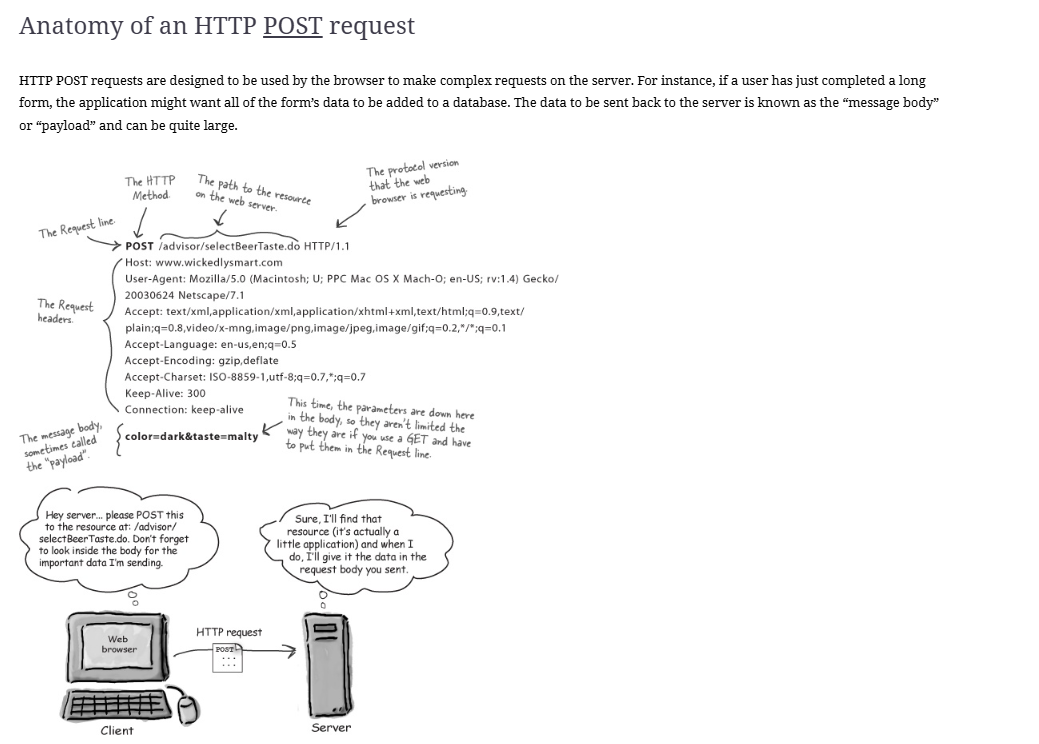

In [26]:
import requests
data = {'name': 'Chandana', 'email': 'Chandana@google.com'}
response = requests.post('https://jsonplaceholder.typicode.com/users', json=data)
print(response.status_code)
print(response.json())


201
{'name': 'Chandana', 'email': 'Chandana@google.com', 'id': 11}


3. **PUT**: Update an existing resource (or create if it doesn't exist)
   - Not safe: Changes server state
   - Idempotent: Multiple identical requests have same effect as a single request
   - Example: `PUT /api/users/123` with updated user data.

In [24]:
import requests
data = {'name': 'Updated Name'}
response = requests.put('https://jsonplaceholder.typicode.com/users/1', json=data)
print(response.json())

{'name': 'Updated Name', 'id': 1}


4. **DELETE**: Remove a specified resource
   - Not safe: Changes server state
   - Idempotent: Multiple identical requests have same effect as a single request
   - Example: `DELETE /api/users/123`.



In [25]:
import requests
response = requests.delete('https://jsonplaceholder.typicode.com/users/1')
print(response.status_code)

200


5. **PATCH**: Partially update a resource
   - Not safe: Changes server state
   - Not idempotent: Effects may vary
   - Example: `PATCH /api/users/123` with partial data. 

In [27]:
import requests
data = {'email': 'new@email.com'}
response = requests.patch('https://jsonplaceholder.typicode.com/users/1', json=data)
print(response.json())

{'id': 1, 'name': 'Leanne Graham', 'username': 'Bret', 'email': 'new@email.com', 'address': {'street': 'Kulas Light', 'suite': 'Apt. 556', 'city': 'Gwenborough', 'zipcode': '92998-3874', 'geo': {'lat': '-37.3159', 'lng': '81.1496'}}, 'phone': '1-770-736-8031 x56442', 'website': 'hildegard.org', 'company': {'name': 'Romaguera-Crona', 'catchPhrase': 'Multi-layered client-server neural-net', 'bs': 'harness real-time e-markets'}}


## HTTP Status Codes

Status codes are an important part of the API response. They provide immediate feedback on the result of a request and should be used consistently for better error handling.

### Status Code Categories

1. **1xx (Informational)**: Request received, continuing process
   - 100: Continue
   - 101: Switching Protocols

2. **2xx (Success)**: Request successfully received, understood, and accepted
   - 200: OK - Standard success response (e.g., successful GET)
   - 201: Created - Resource created successfully (e.g., after POST)
   - 202: Accepted - Request accepted but processing not complete (async operations)
   - 204: No Content - Success but nothing to return (often used for DELETE or updates without data)

3. **3xx (Redirection)**: Further action needed to complete request
   - 301: Moved Permanently (permanent redirect)
   - 302: Found (Temporary Redirect)
   - 304: Not Modified (used with conditional GET requests for caching)

4. **4xx (Client Error)**: Error caused by the client
   - 400: Bad Request - Generic client error (invalid syntax)
   - 401: Unauthorized - Authentication required or failed
   - 403: Forbidden - Authentication succeeded but user lacks permission
   - 404: Not Found - Resource doesn't exist
   - 405: Method Not Allowed - HTTP method not supported for this resource
   - 409: Conflict - Request conflicts with current state (e.g., duplicate resource)
   - 422: Unprocessable Entity - Request understood but semantically incorrect (validation errors)

5. **5xx (Server Error)**: Error on the server side
   - 500: Internal Server Error - Generic server error (catch-all for unexpected issues)
   - 502: Bad Gateway - Server acting as gateway received invalid response
   - 503: Service Unavailable - Server temporarily unable to handle request (e.g., maintenance)
   - 504: Gateway Timeout - Gateway timeout waiting for response

Best practice: Include error details in the response body for 4xx/5xx codes, e.g., JSON with "message" and "details" for debugging.

# Async Programming

Asynchronous programming allows a program to handle multiple tasks concurrently without waiting for each task to complete before starting the next. This is particularly useful for **I/O-bound operations** (e.g., network requests, file reading) where tasks spend significant time waiting.


### Analogy: Synchronous vs. Asynchronous

- **Synchronous Programming**: Imagine a chef cooking one dish at a time in a restaurant. They wait for the soup to simmer before starting the salad, then wait for the salad to be prepped before grilling the steak. If any step (like simmering) takes time, the chef is idle, wasting time.
- **Asynchronous Programming**: Now imagine the chef starting the soup, then _while it simmers_, prepping the salad, and _while the salad chills_, grilling the steak. The chef switches between tasks during idle moments, completing all dishes faster.

### Benefits of Asynchronous Programming

- **Efficiency**: Reduces idle time during I/O operations.
- **Responsiveness**: Keeps applications (e.g., web servers, GUIs) responsive by handling multiple tasks concurrently.
- **Scalability**: Manages thousands of tasks (e.g., network connections) without heavy resource use.


## 2. Choosing the Right Concurrency Model

Python offers three main concurrency models: **Asyncio**, **threading**, and **multiprocessing**. Each suits different use cases.

|**Model**|**Best For**|**Use Case**|**Key Characteristics**|
|---|---|---|---|
|**Asyncio**|I/O-bound tasks (e.g., network, file I/O)|Web scraping, API calls, database queries|Single-threaded, cooperative multitasking, lightweight|
|**Threading**|I/O-bound tasks with shared data|GUI apps, lightweight parallel tasks|Multiple threads, limited by Python’s GIL|
|**Multiprocessing**|CPU-bound tasks|Data processing, machine learning, heavy computations|Multiple processes, fully parallel, high resource use|


### When to Use Asyncio

- Ideal for **I/O-bound tasks** where tasks wait (e.g., HTTP requests, file reading).
- Efficient for handling **many concurrent tasks** (e.g., thousands of network connections).
- Avoid for **CPU-bound tasks** (e.g., complex calculations), as it runs on a single thread.


In [29]:
# co-routines
#
# task 1 -> 37 X 37
#




## 3. Core Concepts in Asyncio

Python’s `asyncio` library (built-in since Python 3.5, with enhancements in 3.11+) enables asynchronous programming. Below are its key components.


### 3.1. The Event Loop

The **event loop** is the heart of `asyncio`, acting as a task manager that schedules and runs asynchronous tasks.

- **Role**: Coordinates when tasks run, pause, or resume.
- **How It Works**: Tasks (coroutines) are registered with the event loop. When a task awaits an operation (e.g., network request), it yields control back to the loop, allowing other tasks to run. Once the operation completes, the task resumes.
- **Analogy**: Think of the event loop as an air traffic controller, directing planes (tasks) to land or wait based on runway availability.

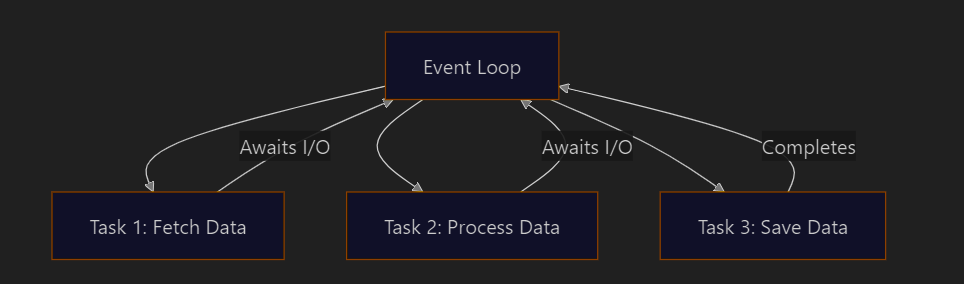

### 3.2. Coroutines

A **coroutine** is a special function defined with the `async def` keyword, allowing it to be paused and resumed.

- **Key Points**:
    - Calling a coroutine function (e.g., `main()`) returns a **coroutine object**, which doesn’t execute until awaited or scheduled.
    - Use `asyncio.run()` to start the event loop and execute a coroutine.
    - Coroutines are the building blocks of asynchronous code.

In [33]:
async def fun(arg):
    pass

In [35]:
fun('i')

<coroutine object fun at 0x00000261DA077E80>

In [41]:
import nest_asyncio
nest_asyncio.apply()

In [ ]:
import time

print('hi')
time.sleep(2) # blocking in nature
print('bye')


hi
bye


In [ ]:
import asyncio

async def greet():
    print("Hello, starting coroutine!")
    await asyncio.sleep(1)  # Simulate I/O delay
    print("Coroutine complete!")

if __name__ == "__main__":
    asyncio.run(greet())


# Output:
# Hello, starting coroutine!
# (1-second pause)
# Coroutine complete!

Hello, starting coroutine!
Coroutine complete!


In [46]:
import asyncio

async def greet2():
    print("This won't run without awaiting!")

if __name__ == "__main__":
    asyncio.run(greet2())

This won't run without awaiting!



### 3.3. The `await` Keyword

The `await` keyword pauses a coroutine until the awaited operation completes, yielding control to the event loop.

- **Usage**: Only valid inside `async def` functions.
- **Behavior**: When a coroutine encounters `await`, it suspends execution, allowing other tasks to run until the awaited operation finishes.
- **Sequential Execution**: Awaiting coroutines one after another runs them sequentially, negating concurrency benefits.

In [50]:
import asyncio
import time

async def fetch_data(id, delay):
    print(f"Fetching data ID: {id}...")
    await asyncio.sleep(delay)  # Simulate I/O
    print(f"Data fetched ID: {id}")
    return f"Data {id}"

async def main():
    start_time = time.time()
    result1 = await fetch_data(1, 2)
    result2 = await fetch_data(2, 2)
    print(f"Results: {result1}, {result2}")
    print(f"Total time: {time.time() - start_time:.2f} seconds")

if __name__ == "__main__":
    asyncio.run(main())

Fetching data ID: 1...
Data fetched ID: 1
Fetching data ID: 2...
Data fetched ID: 2
Results: Data 1, Data 2
Total time: 4.02 seconds


### 3.4. Tasks

**Tasks** allow coroutines to run concurrently by scheduling them on the event loop.

- **Purpose**: Overcome sequential execution by running multiple coroutines simultaneously.
- **How It Works**: Tasks switch control when one coroutine awaits, maximizing efficiency.
- **Methods to Create Tasks**:
    - `asyncio.create_task()`: Schedules a single coroutine.
    - `asyncio.gather()`: Runs multiple coroutines concurrently and collects results.
    - `asyncio.TaskGroup()`: Manages a group of tasks with automatic error handling (Python 3.11+).

In [51]:
import asyncio
import time

async def fetch_data(id, delay):
    print(f"Fetching data ID: {id}...")
    await asyncio.sleep(delay)
    print(f"Data fetched ID: {id}")
    return f"Data {id}"

async def main():
    start_time = time.time()
    task1 = asyncio.create_task(fetch_data(1, 2))
    task2 = asyncio.create_task(fetch_data(2, 3))
    task3 = asyncio.create_task(fetch_data(3, 1))

    results = await asyncio.gather(task1, task2, task3)
    print(f"Results: {results}")
    print(f"Total time: {time.time() - start_time:.2f} seconds")



if __name__ == "__main__":
    asyncio.run(main())


Fetching data ID: 1...
Fetching data ID: 2...
Fetching data ID: 3...
Data fetched ID: 3
Data fetched ID: 1
Data fetched ID: 2
Results: ['Data 1', 'Data 2', 'Data 3']
Total time: 3.02 seconds


In [52]:
import asyncio
import time

async def fetch_data(id, delay):
    print(f"Fetching data ID: {id}...")
    await asyncio.sleep(delay)
    print(f"Data fetched ID: {id}")
    return f"Data {id}"

async def main():
    start_time = time.time()
    results = await asyncio.gather(
        fetch_data(1, 2),
        fetch_data(2, 3),
        fetch_data(3, 1)
    )
    print(f"Results: {results}")
    print(f"Total time: {time.time() - start_time:.2f} seconds")

if __name__ == "__main__":
    asyncio.run(main())
# Output: Similar to create_task, ~3 seconds

Fetching data ID: 1...
Fetching data ID: 2...
Fetching data ID: 3...
Data fetched ID: 3
Data fetched ID: 1
Data fetched ID: 2
Results: ['Data 1', 'Data 2', 'Data 3']
Total time: 3.00 seconds


--- 
### Async Nuances


In [ ]:
import requests

url = "https://pokeapi.co/api/v2/pokemon/pikachu"

def make_request():
    pikachu_response = requests.get(url)
    return pikachu_response.json()


make_request() # this works fine, no problem at all

In [ ]:
import asyncio
import requests

url = "https://pokeapi.co/api/v2/pokemon/pikachu"

async def make_request():
    pikachu_response = await requests.get(url)
    return pikachu_response.json()

# make_request()

if __name__ == "__main__":
    result = asyncio.run(make_request())
    print(result) 

# does not work


#### Beasue:
The error occurs because we're trying to use the `await` keyword with a function (`requests.get`) that is **not asynchronous**.

- `requests.get(url)` is a **blocking, synchronous** function from the **`requests`** library.
- The `await` keyword only works with **coroutines** or **awaitable objects**, such as those returned by **`async def` functions** or by **asynchronous libraries** like `aiohttp`.
- Python raises an error because `requests.get(url)` returns a `requests.Response` object, which is **not awaitable**.

In [ ]:
import asyncio
import httpx

url = "https://pokeapi.co/api/v2/pokemon/pikachu"

async def make_request():
    async with httpx.AsyncClient() as client:
        pikachu_response = await client.get(url)
        return pikachu_response.json()

if __name__ == "__main__":
    result = asyncio.run(make_request())
    print(result)

In [57]:
import requests

base_url = "https://pokeapi.co/api/v2/pokemon/"

def fetch_pokemon(session, pokemon_name):
    response = session.get(f"{base_url}{pokemon_name}")
    return response.json()

def make_requests():
    pokemon_names = ["pikachu", "charizard", "bulbasaur"]
    with requests.Session() as session:
        results = [fetch_pokemon(session, name) for name in pokemon_names]
        return results

if __name__ == "__main__":
    results = make_requests()
    for pokemon in results:
        print(f"Name: {pokemon['name']}, ID: {pokemon['id']}")

Name: pikachu, ID: 25
Name: charizard, ID: 6
Name: bulbasaur, ID: 1


In [58]:
import aiohttp

url = "https://pokeapi.co/api/v2/pokemon/pikachu"

async def func_call():
    async with aiohttp.ClientSession() as session:
        async with session.get(url) as res:
            return await res.text() 

func_call()

<coroutine object func_call at 0x00000261DAA9F880>

In [64]:
import aiohttp
import asyncio

url = "https://pokeapi.co/api/v2/pokemon/pikachu"

async def func_call():
    async with aiohttp.ClientSession() as session:
        async with session.get(url) as res:
            return await res.json()

if __name__ == "__main__":
    result = asyncio.run(func_call())
    print(result['id'])

25


### Example

In [65]:
import asyncio
import time

async def fetch_url(url, delay):
    print(f"Starting fetch: {url}")
    await asyncio.sleep(delay)  # Simulate network delay
    print(f"Completed fetch: {url}")
    return f"Content from {url}"


async def main():
    start_time = time.time()
    urls = [
        ("http://site1.com", 2),
        ("http://site2.com", 3),
        ("http://site3.com", 1)
    ]

    tasks = [asyncio.create_task(fetch_url(url, delay)) for url, delay in urls]
    results = await asyncio.gather(*tasks, return_exceptions=True)

    for url, result in zip([url for url, _ in urls], results):
        print(f"Result for {url}: {result}")
    print(f"Total time: {time.time() - start_time:.2f} seconds")


if __name__ == "__main__":
    asyncio.run(main())



Starting fetch: http://site1.com
Starting fetch: http://site2.com
Starting fetch: http://site3.com
Completed fetch: http://site3.com
Completed fetch: http://site1.com
Completed fetch: http://site2.com
Result for http://site1.com: Content from http://site1.com
Result for http://site2.com: Content from http://site2.com
Result for http://site3.com: Content from http://site3.com
Total time: 3.01 seconds
